# Measurement of the sky brightness

Knowledge of the signal from the sky background (in electrons / second) is necessary to determine the [optimal exposure time](exposure.ipynb).

## Data acquisition
Pick a dark region of the sky, free of large objects / nebulae / bright stars, the objective being to measure the brightness of the sky background itself. Take a picture with each one of the seven filters (L, R, G, B, H&#0945;, SII, OIII) with an exposure time of 90 seconds, which should be enough to get significant sky signal.

## Data reduction
In order to reduce the data, we need to have the detector gain measured so that we can convert DNs to electrons. See the [PTC](ptc.ipynb) notebook.
We then read in each image, subtract the dar frame, convert to electrons, and normalize to the exposure time. For each image, we plot the middle row, and compute the median value  over the whole frame. The median is used to estimate the value of the background without being affected too much by the stars.

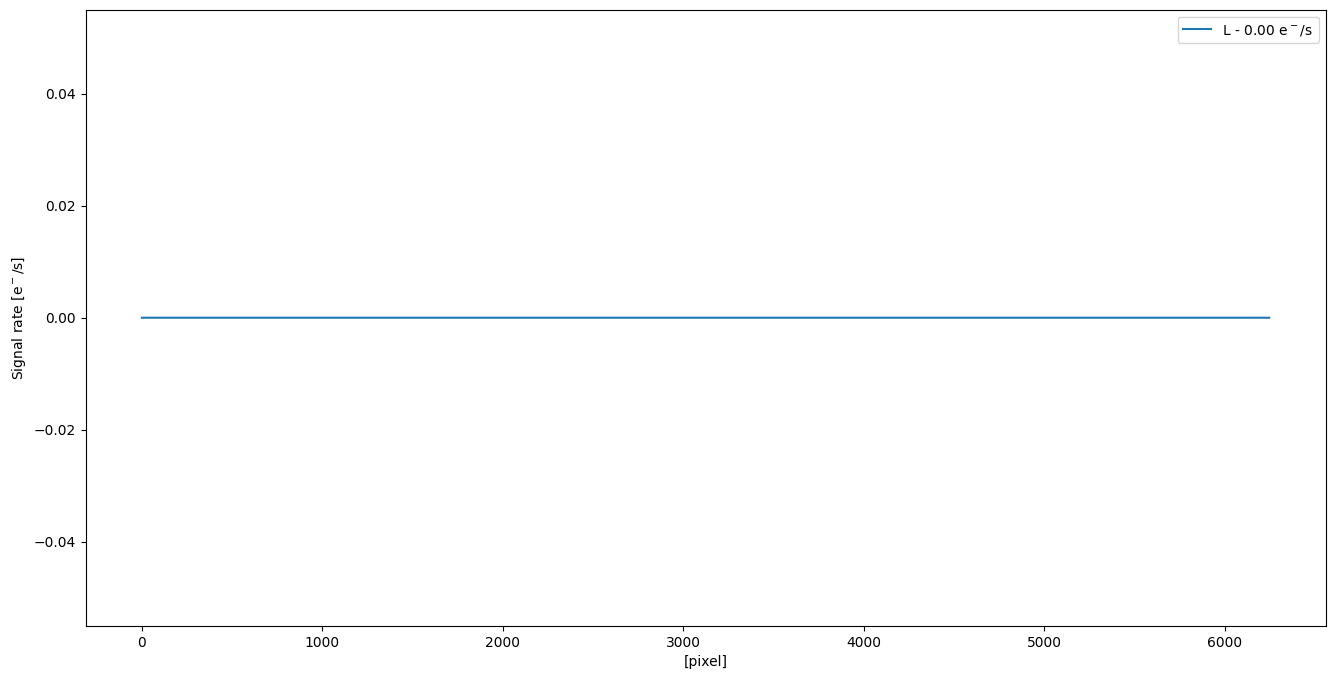

In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

dark_file = r''
dark = fits.getdata(dark_file)

sky_files = [r'', r'', r'', r'', r'', r'', r'']
labels = ['L', 'R', 'G', 'B', 'SII', 'H$\\alpha$', 'OIII']
gain = 1

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
for f, l in sky_files, labels:
    with fits.open(f) as hdu:
        image = hdu[0].data
        header = hdu[0].header
    image -= dark  # subtract the dark
    image *= gain  # convert to electrons
    image /= header['XPOSURE']  # normalize to exposure time
    ax.plot(image[image.shape[0] //2, :], label=f'{l} - {np.median(image):0.2f} e$^-$/s')

ax.set_xlabel('[pixel]')
ax.set_ylabel('Signal rate [e$^-$/s]')
ax.legend()

## Interpretation
- Check tha the median values correspond to the level estimated visually from the curves.
- Compare the electron rate value obtained with the estimate from [this tool](https://tools.sharpcap.co.uk/). The sky brightness at OHP (in magnitude per arcsecond&#0178;) can be found on this [light pollution map](https://www.lightpollutionmap.info/). The measured F/D ratio of the ESPRIT 100 ED refractor is 5.55 (1% larger than listed in the [user's manual](https://inter-static.skywatcher.com/upfiles/en_download_caty01390352363.pdf)). The pixel size and quantum efficiency of the ASI 2600 camera can be found in its [user's manual](https://astronomy-imaging-camera.com/manuals/ASI2600_Manual_EN.pdf). The bandwidths of the filters can be found on the manufacturer's website [LRGB](https://www.baader-planetarium.com/en/filters/l-rgb-cmos-filters/baader-lrgb-filter-set-%E2%80%93-cmos-optimized.html), [SII, H&#0945;, OIII](https://www.baader-planetarium.com/en/filters/(ultra-)-narrowband-/-highspeed/baader-6.5nm-narrowband-filter-set-%E2%80%93-cmos-optimized-(h-alpha--o-iii--s-ii).html).
